<a href="https://colab.research.google.com/github/IngerMasha/week14/blob/main/day4/Daily_Challenge_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
print(df.isnull().sum())
df = df.drop(columns=['Unnamed: 32'])

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

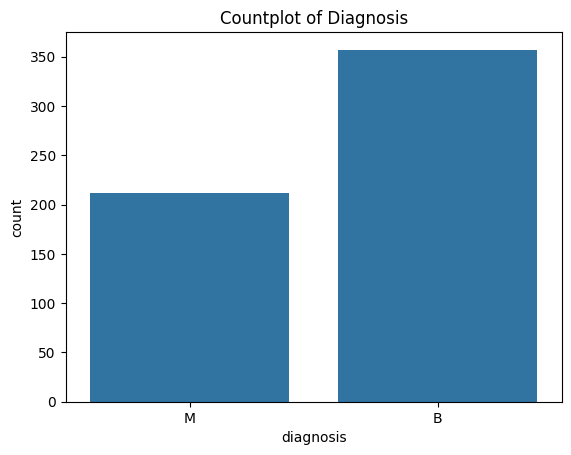

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df.drop(columns=['id'])


# Create a countplot
sns.countplot(x='diagnosis', data=df)
plt.title('Countplot of Diagnosis')
plt.show()

In [6]:
print(df['diagnosis'].value_counts())
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

diagnosis
B    357
M    212
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}')

Logistic Regression Accuracy: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(f'K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred_knn)}')

K-Nearest Neighbors Accuracy: 0.9590643274853801


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')


Random Forest Accuracy: 0.9707602339181286


In [11]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print(f'Support Vector Machine Accuracy: {accuracy_score(y_test, y_pred_svm)}')


Support Vector Machine Accuracy: 0.935672514619883


In [12]:
accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

best_model = max(accuracies, key=accuracies.get)
print(f'The best model is: {best_model} with an accuracy of {accuracies[best_model]}')


The best model is: Random Forest with an accuracy of 0.9707602339181286
